In [21]:
import numpy as np
import matplotlib.pyplot as plt

## Young's Slits experiment
### Optical set up

In [20]:
# --- DEFINE OPTICAL SET UP --- #
aperture_width = 0.9e-4 # width of individual slits [metres]
wavelength = 500.0e-9 # wavelength of incident light [metres]
I0 = 1.0 # intensity of incident light [some arbitrary units]
double_slit_sep = 1.5e-3 # separation between slits [metres]
screen_dist = 1.0 #screen distance from slits [metres]

# --- STANDARD PARAMETERS ---#
angs_deg = np.arange(-0.5, 0.5, 0.00001) #180degs
angs_rad = np.radians(angs_deg) #angles in radians

# --- PLOTTING PARAMETERS ---#
x_max = 0.5

### Single Slit Intensity


In [17]:
phase_angles_single = (2.0 * np.pi * aperture_width * np.sin(angs_rad)) / wavelength
intensity_single = I0 * ((np.sin(phase_angles_single) * np.sin(phase_angles_single))
                    / (phase_angles_single * phase_angles_single))

### Double Slit Intensity

In [18]:
orders_considered = np.arange(0.0,3.0,1.0)

construct_ang = np.arcsin((orders_considered * wavelength) / double_slit_sep)
destruct_ang = np.arcsin(((orders_considered+0.5) * wavelength) / double_slit_sep)

k = (2.0 * np.pi) / construct_ang[1]

intensity_double_no_interfer = I0/2.0 * np.cos((k * angs_rad)) + (I0/2.0)
intensity_double = intensity_double_no_interfer * intensity_single


### Plot Interference Pattern

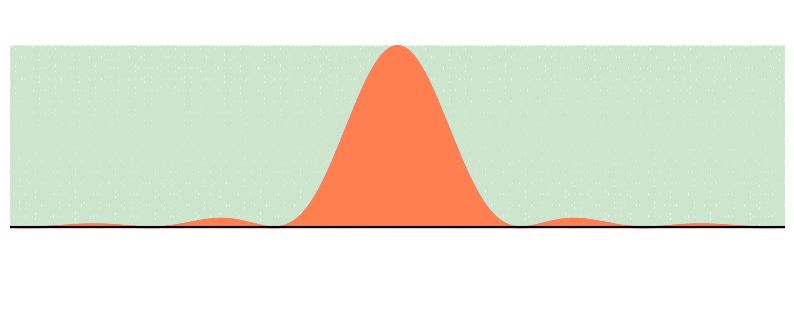

In [19]:
# --- PLOT
fig, axes = plt.subplots(ncols=1, figsize=[10,4])

# --- Single slit intensity pattern
axes.plot(angs_deg,intensity_single,'-',color = 'hotpink')

# --- Double slit without single slit envelope.
axes.plot(np.degrees(angs_rad),
          intensity_double_no_interfer,
          'g-.',alpha=0.2)

# --- Double slit with single slit envelope.
axes.plot(np.degrees(angs_rad),
          intensity_double,
          '-',color = 'coral')

# --- Optical Bench 
screen = axes.plot([-x_max,x_max],[0,0],'k-')

axes.set_xlim([-x_max,x_max])
axes.set_ylim([-0.5,1.2])
plt.axis('off')
plt.show()